# Housing Days On Market - Supervised Model Metric Analysis

## Information

Housing related data sources were combined in the project SQLite database. The output CSV file is analyzed here. 

### Environment Information:

Environment used for coding is as follow:

Oracle VM VirtualBox running Ubuntu (guest) on Windows 10 (host).

Current conda install:

               platform : linux-64
          conda version : 4.2.13
       conda is private : False
      conda-env version : 4.2.13
    conda-build version : 1.20.0
         python version : 2.7.11.final.0
       requests version : 2.9.1
       default environment : /home/jonathan/anaconda2/envs/py35
       
       Python 3.5.2 :: Anaconda 4.1.1 (64-bit)

Package requirements:

dill : 0.2.5, numpy : 1.11.3, pandas : 0.18.1, matplotlib : 1.5.1, scipy : 0.18.1, seaborn : 0.7.1, scikit-image : 0.12.3, scikit-learn : 0.18.1

## Python Package(s) Used

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
from pandas.tools.plotting import lag_plot, bootstrap_plot
from scipy.stats import probplot, skew, skewtest, kurtosis, kurtosistest, ppcc_plot, ppcc_max
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
plt.style.use('seaborn-whitegrid')

## Data and Methods

### Data Fetching

In [5]:
# Import files from disk
estimator_lst_str = ['SGDR','TSR','PAR','HR','LCV','RCV','ENCV','KNNR','RFR','ETR','GBR','SVR']

def df_combine_GridSearchCV_regression_metrics(eps_str,qcut_str,target_str,estimator_lst_str):
    # Create dataframe
    df_combination = pd.DataFrame()
    
    # For loop to import files from disk iteratively and append them together. 
    for i in estimator_lst_str:
        df_est = pd.read_csv('GridSearchCV_model_selection_'+i+'_eps_'+eps_str+'_qcut_'+qcut_str+'_target_'+target_str+'_regression_metrics.csv')
        df_combination = df_combination.append(df_est)
        
    # Drop specific column. 
    df_combination = df_combination.drop('Unnamed: 0', axis = 1)
    
    # Sort dataframe by score.
    df_combination = df_combination.sort_values(by='r2_score')
    
    # Save dataframe to disk.
    df_combination.to_csv('df_GridSearchCV_model_selection_combined_eps_'+eps_str+'_qcut_'+qcut_str+'_target_'+target_str+'_regression_metrics.csv')
    return df_combination

In [6]:
df_combine_GridSearchCV_regression_metrics('01','1,1','DOMP',estimator_lst_str)

,mse,estimator,process_time,mae,r2_score,exp_var_score
0,6896.933756,SVR,1073.741365,41.900334,-0.041598,0.086844
0,6589.017922,HR,15.086283,42.774088,0.006631,0.084065
0,5861.333908,PAR,20.037473,47.588277,0.081174,0.115985
0,5995.306003,TSR,107.382503,44.990459,0.092476,0.107776
0,5815.633216,SGDR,33.235217,47.339332,0.098991,0.122818
0,5816.987002,LCV,20.411014,47.614439,0.107808,0.122375
0,5817.573334,RCV,9.229973,47.616864,0.107809,0.122286
0,5800.375083,ENCV,70.365790,47.560376,0.108424,0.124881
0,5637.368335,KNNR,592.420046,46.398812,0.116251,0.149605
0,5511.715773,GBR,87.774719,46.181991,0.123414,0.168521


## Analysis of Models

In [7]:
# Perform analysis of the models' regression metrics
def model_regression_metrics_analysis(eps_str,qcut_str,target_str):
    # Import data from disk
    df_combination = pd.read_csv('df_GridSearchCV_model_selection_combined_eps_'+eps_str+'_qcut_'+qcut_str+'_target_'+target_str+'_regression_metrics.csv')
    df_combination = df_combination.drop('Unnamed: 0',axis=1)    
    
    # Descriptive statistics of dataframe
    print(df_combination.describe())
    
    # Print out maximum value for specific columns
    for i in df_combination.columns.difference(['process_time','estimator']):
        print(' ')
        print(i)
        print(df_combination[df_combination[i] == df_combination[i].max()])
        print(' ')

    # Dataframe sorted by processing time
    print('Sorted by process time')
    print(df_combination.sort_values(by='process_time'))
    print(' ')
    
    # Plot r^2 score vs processing time
    plt.figure()
    plt.scatter(df_combination['process_time'], df_combination['r2_score'],s=50)
    plt.title('r^2 score vs. processing time',fontsize=18,fontweight='bold')
    plt.xlabel("Processing time (s)",fontsize=14,fontweight='bold')
    plt.xticks(fontsize=14,fontweight='bold')
    plt.ylabel("r^2 score",fontsize=14,fontweight='bold')
    plt.yticks(fontsize=14,fontweight='bold')
    plt.legend(fontsize=16,frameon=True).get_frame().set_linewidth(3)
    plt.savefig('Models_regression_metrics_eps_'+eps_str+'_qcut_'+qcut_str+'_target_'+target_str+'plot_r2_score_vs_processing_time')
    plt.show()
    
    # First pass for looking at frequency costs as a function of column, testing data for normality,
    # testing data for randomness, analyzing uncertainity of mean, median, and midrange values
    df_combination_2 = df_combination.drop('estimator', axis=1)

    # Specific parameters not evaluated here due to small dataset size
    for i in df_combination_2.iloc[:,:]:
        print(i) 
        print("Skew: ", round(skew(df_combination_2.iloc[:,:][i]),3))
        #print "Skew test: ", skewtest(df_combination_2.iloc[:,:][i])
        print("Kurtosis: ", round(kurtosis(df_combination_2.iloc[:,:][i]),3))
        #print "Kurtosis test: ", kurtosistest(df_combination_2.iloc[:,:][i])
        #print " "
        print("PPCC_max value: ", round(ppcc_max(df_combination_2.iloc[:,:][i], brack = (-10,10)),3))
        #www.itl.nist.gov/div898/handbook/eda/section3/ppccplot.htm
        #ppcc_max~0.14 indicates a normal distribution. Less than 0.14 indicates
        #long-tailed distributions (Cauchy).
        #Greater than 0.14 indicates short-tailed distributions (Beta or uniform).
        print(' ')

        plt.figure(1, figsize = (10,10), dpi = 80)
        #histogram plot
        plt.subplot(321)
        plt.title("Histogram")
        plt.hist(df_combination_2.iloc[:,:][i])

        #box and whiskers plot 
        plt.subplot(322)
        plt.title("Box-Whiskers")
        plt.boxplot(df_combination_2.iloc[:,:][i])

        #normal probability plot - test for normality
        plt.subplot(323)
        plt.title("Normal Probability Test")
        probplot(df_combination_2.iloc[:,:][i], plot=plt)

        #run-sequence plot - test for outliers, and shifts in location and variation
        plt.subplot(324)
        plt.title("Run-Sequence")
        plt.scatter(df_combination_2.iloc[:,:][i].index, df_combination_2.iloc[:,:][i])

        #lag plot - test for randomness
        plt.subplot(325)
        #plt.title("Lag")
        lag_plot(df_combination_2.iloc[:,:][i])

        # Bootstrap plot not used here due to small dataset size
        #bootstrap plot - test for uncertainity of mean, median, and midrange
        #bootstrap_plot(df_combination_2.iloc[:,:][i], size = 100, samples = 100, color = 'grey')

        plt.tight_layout()
        plt.show()

               mse  process_time        mae   r2_score  exp_var_score
count    12.000000     12.000000  12.000000  12.000000      12.000000
mean   5888.189681    182.596780  46.077152   0.088791       0.129964
std     439.735715    322.804702   1.950151   0.052927       0.032119
min    5393.412104      9.229973  41.900334  -0.041598       0.084065
25%    5608.681186     20.317629  45.565335   0.089651       0.113933
50%    5816.310109     56.222824  46.801350   0.107808       0.122596
75%    5894.826932    110.386157  47.567351   0.118042       0.154236
max    6896.933756   1073.741365  47.616864   0.138451       0.186279
 
exp_var_score
            mse estimator  process_time        mae  r2_score  exp_var_score
11  5393.412104       ETR     42.079858  45.756961  0.138451       0.186279
 
 
mae
           mse estimator  process_time        mae  r2_score  exp_var_score
6  5817.573334       RCV      9.229973  47.616864  0.107809       0.122286
 
 
mse
           mse estimator  process_ti

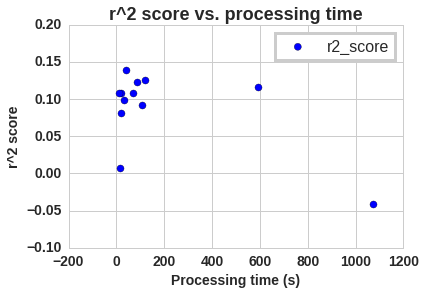

mse
Skew:  1.263
Kurtosis:  0.657
PPCC_max value:  5.972
 


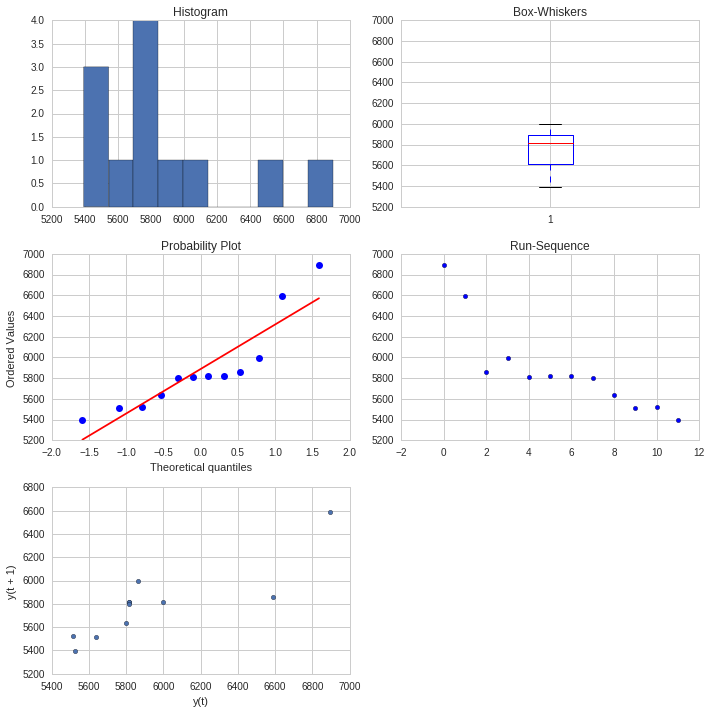

process_time
Skew:  2.114
Kurtosis:  3.057
PPCC_max value:  8.852
 


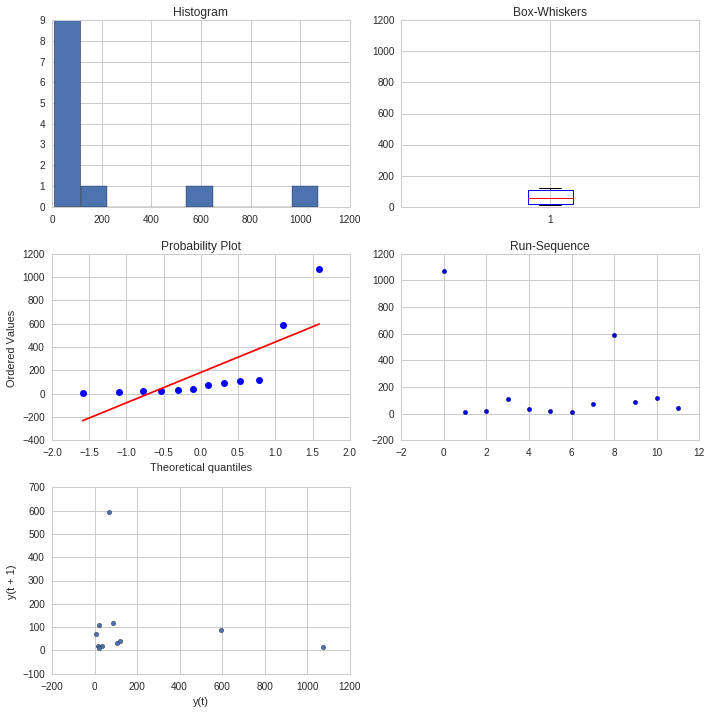

mae
Skew:  -1.187
Kurtosis:  0.087
PPCC_max value:  3.581
 


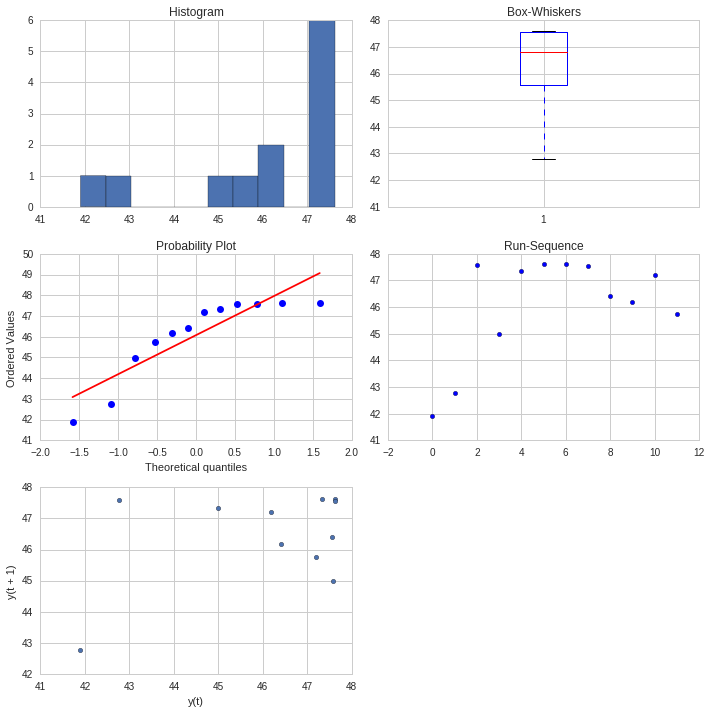

r2_score
Skew:  -1.61
Kurtosis:  1.36
PPCC_max value:  6.616
 


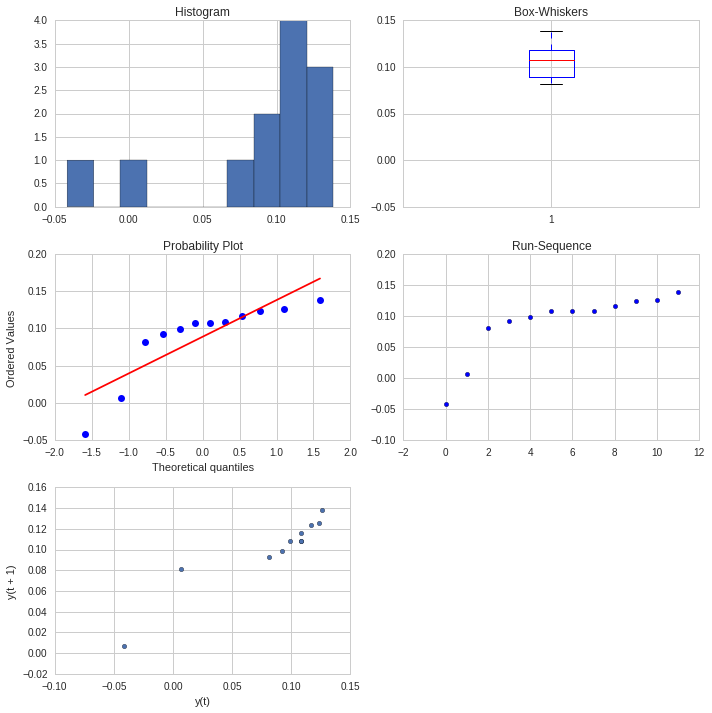

exp_var_score
Skew:  0.307
Kurtosis:  -0.882
PPCC_max value:  3.78
 


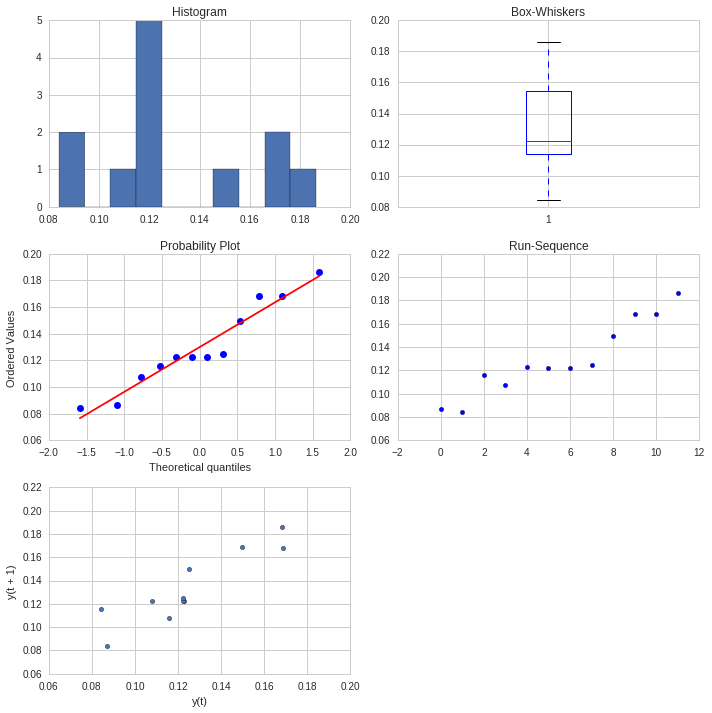

In [8]:
model_regression_metrics_analysis('01','1,1','DOMP')